<a href="https://colab.research.google.com/github/Quoc18082004/SOURCE_ASM2_1ST_BPS_AnhDQ_BH00823/blob/main/source_asm2_1st_bps_anhdq_bh00823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = 'supermarket_sales.csv'
df = pd.read_csv(file_path)

print(df.head())

missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

df_cleaned = df.dropna()

print(df_cleaned.describe())

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

duplicates = df_cleaned.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

df_cleaned = df_cleaned.drop_duplicates()

print(df_cleaned.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

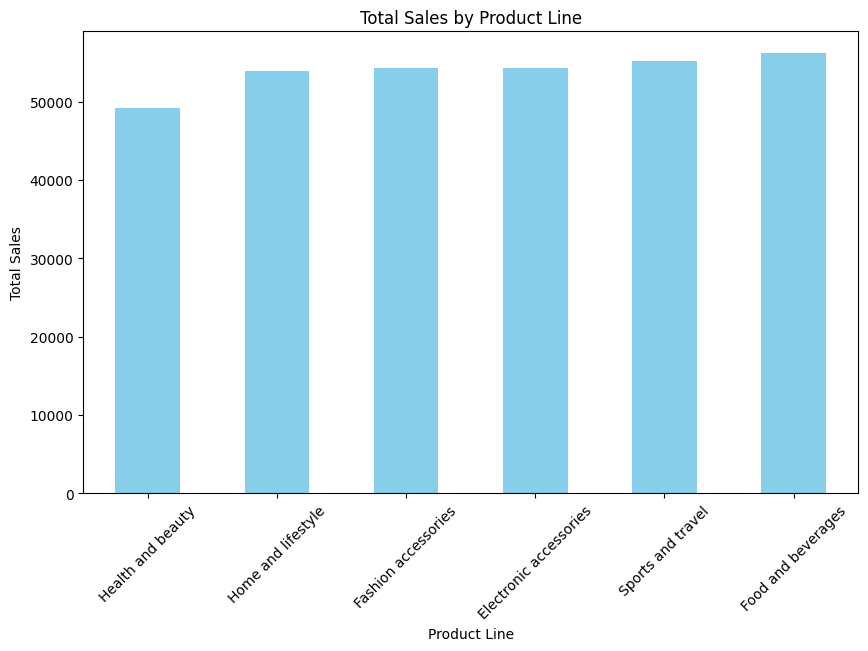

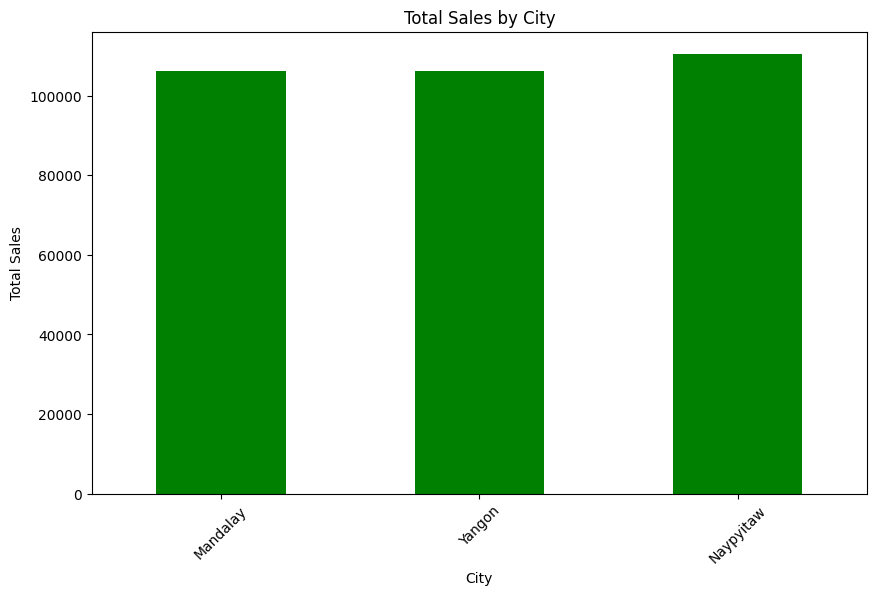

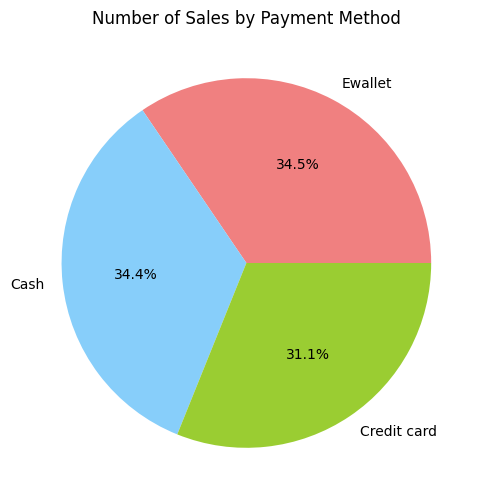

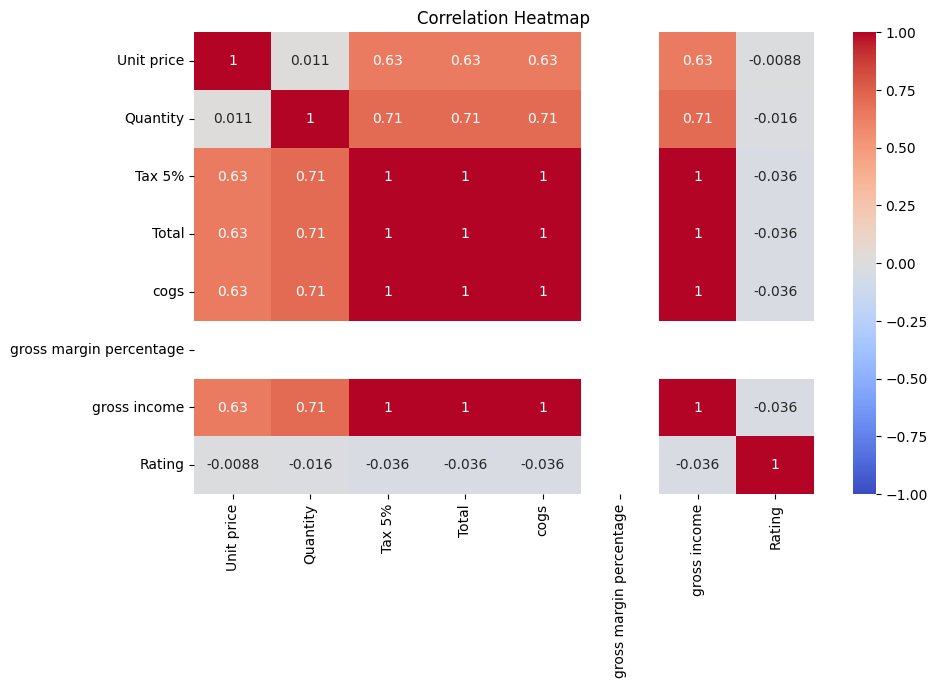

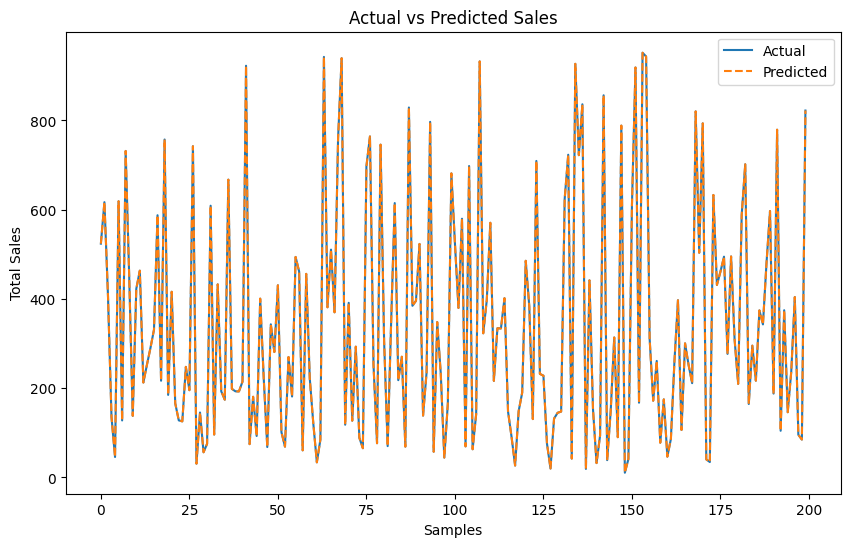

Mean Squared Error: 1.0216747420518113e-25
R-squared: 1.0
Predicted future sales: [523.95522388]
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross incom

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('supermarket_sales.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and create a new 'Month' column
df['Month'] = df['Date'].dt.to_period('M')

# Chart 1: Total sales by product line
plt.figure(figsize=(10, 6))
product_line_sales = df.groupby('Product line')['Total'].sum().sort_values()
product_line_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Chart 2: Total sales by city
plt.figure(figsize=(10, 6))
city_sales = df.groupby('City')['Total'].sum().sort_values()
city_sales.plot(kind='bar', color='green')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Chart 3: Number of sales by payment method
plt.figure(figsize=(10, 6))
payment_method_count = df['Payment'].value_counts()
payment_method_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'yellowgreen'])
plt.title('Number of Sales by Payment Method')
plt.ylabel('')
plt.show()

# Chart 4: Correlation heatmap
plt.figure(figsize=(10, 6))
df_corr = df.drop(columns=['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment', 'Month'])
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


X = df[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross income']]
y = df['Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Total Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

future_sales = model.predict([[100, 5, 5, 500, 25]])
print(f"Predicted future sales: {future_sales}")

print(df.head())


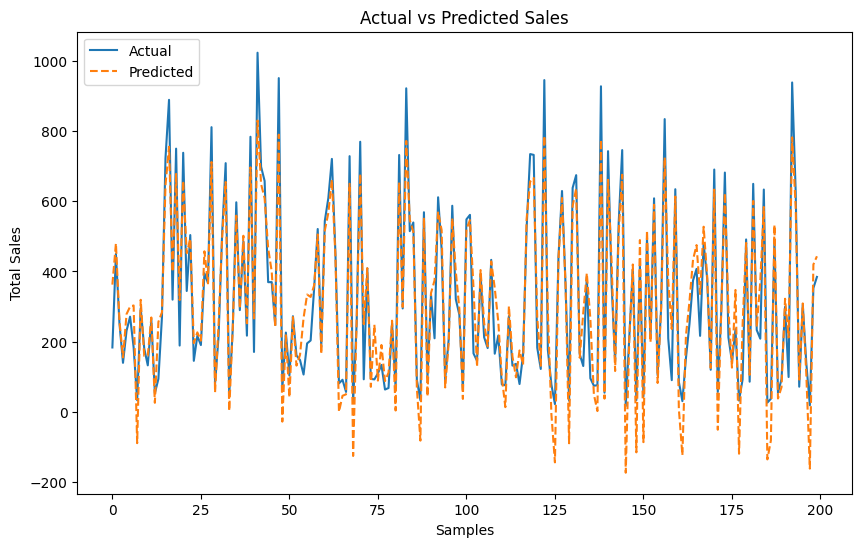

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


df = pd.read_csv('supermarket_sales.csv')

# Data preparation
X = df[['Unit price', 'Quantity']]
# Dependent variable
y = df['Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future sales
y_pred = model.predict(X_test)

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Total Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()